In [1]:
%matplotlib inline

import io, os, sys, types, datetime, pickle, warnings

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import numpy as np

warnings.filterwarnings('ignore')

In [2]:
master_path = os.getcwd()
if master_path not in sys.path:
    sys.path.append(master_path)

In [3]:
def parse_folder_info(path):
    folders = [f for f in os.listdir(path) if not os.path.isfile(os.path.join(path, f))]
    files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    if('.DS_Store' in files):
        files.remove('.DS_Store')
    if('._.DS_Store' in files):
        files.remove('._.DS_Store')
    return folders, files

In [4]:
def get_time_columns(columns):
    time_str = []
    time_datetime = []
    for col in columns:
        if col[0].isnumeric():
            time_str.append(col)
            time_datetime.append(datetime.datetime.strptime(col, '%m/%d/%y'))
    return time_str, time_datetime

In [5]:
def format_fn(tick_val, tick_pos):
    if(tick_val >= 0 and tick_val < len(time_str)):
        return time_str[int(tick_val)]
    else:
        return int(tick_val)

In [45]:
cat_color = {'Confirmed':'tab:blue', 'Deaths':'tab:orange', 'Recovered':'tab:green', 'Active':'tab:red'}

In [7]:
path_time_series = os.path.join(master_path, 'csse_covid_19_data', 'csse_covid_19_time_series')

In [8]:
folders, files = parse_folder_info(path_time_series)
df_time_series = pd.DataFrame()
# df_time_series_reorged = pd.DataFrame(columns = ['Country/Region', 'Province/State', 'Date', 'Category', 'Number'])
for file_name in files:
    if('.csv' in file_name):
        df_current = pd.read_csv(os.path.join(path_time_series, file_name))        
        category = file_name[21:file_name.index('.csv')]
        print(category)
        df_current.loc[:,'Category'] = category
        if df_time_series.empty:
            df_time_series = df_current
        else:
            df_time_series = df_time_series.append(df_current, ignore_index = True)

time_str, time_datetime = get_time_columns(df_time_series.columns)
# pd.to_datetime()

Confirmed
Deaths
Recovered


In [9]:
df_time_series.loc[:,'New Today'] = df_time_series.loc[:,time_str[-1]] - df_time_series.loc[:,time_str[-2]]

In [10]:
""" Total Recovered, death, and confirmed """

' Total Recovered, death, and confirmed '

In [37]:
total = df_time_series.groupby('Category').sum().loc[:,time_str]
mainland_china = df_time_series.groupby('Country/Region').get_group('Mainland China').groupby('Category').sum().loc[:,time_str]
others = total - mainland_china

total.loc['Active',:] = total.loc['Confirmed',:] - (total.loc['Recovered',:] + total.loc['Deaths',:])
mainland_china.loc['Active',:] = mainland_china.loc['Confirmed',:] - (mainland_china.loc['Recovered',:] + mainland_china.loc['Deaths',:])
others.loc['Active',:] = others.loc['Confirmed',:] - (others.loc['Recovered',:] + others.loc['Deaths',:])

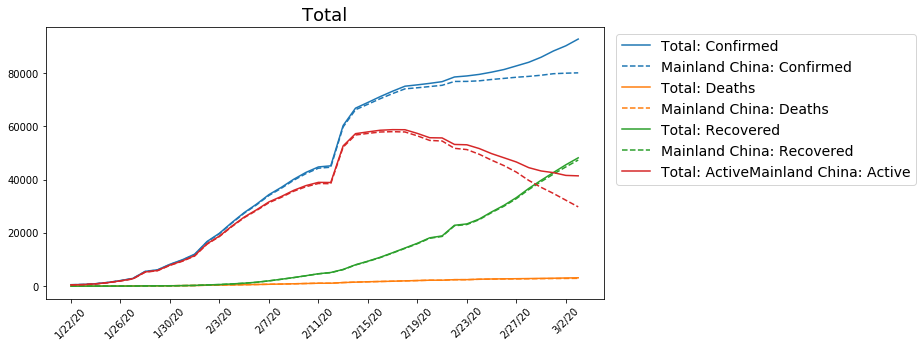

In [46]:
fig, ax1 = plt.subplots(1,1,figsize = (10,5))
for cat in cat_color:
    ax1.plot(total.groupby('Category').get_group(cat).sum()[time_str], color = cat_color[cat])
    ax1.plot(mainland_china.groupby('Category').get_group(cat).sum()[time_str], '--', color = cat_color[cat])
legend = ['Total: Confirmed',
         'Mainland China: Confirmed',
         'Total: Deaths',
         'Mainland China: Deaths',
         'Total: Recovered',
         'Mainland China: Recovered',
         'Total: Active'
         'Mainland China: Active']
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.set_title('Total', size = 18)
plt.legend(legend, bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1, fontsize = 14)


Text(0.5, 1.0, 'Daily Cases')

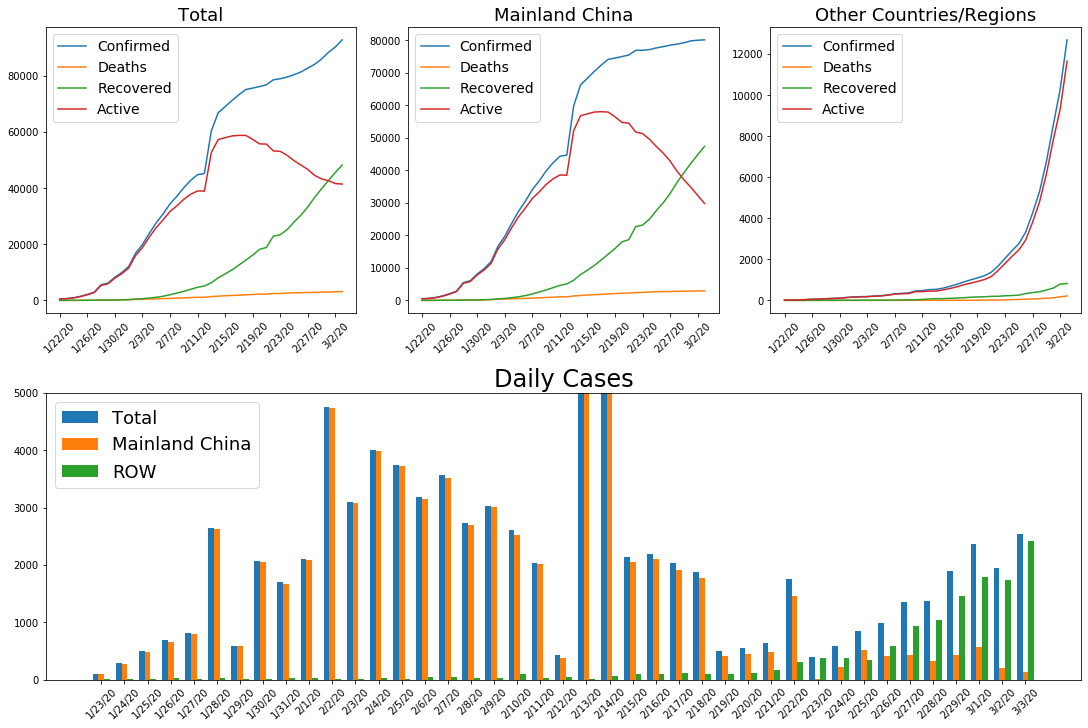

In [44]:
fig = plt.figure(figsize = (15, 10), constrained_layout=True)
gs = fig.add_gridspec(2,3)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(total.transpose())
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.legend(total.index, fontsize = 14)
ax1.set_title('Total', size = 18)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(mainland_china.transpose())
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(mainland_china.index, fontsize = 14)
ax2.set_title('Mainland China', size = 18)

ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(others.transpose())
myLocator = mticker.MultipleLocator(4)
ax3.xaxis.set_major_locator(myLocator)
ax3.tick_params(axis = 'x', labelrotation = 45)
ax3.legend(others.index, fontsize = 14)
ax3.set_title('Other Countries/Regions', size = 18)


ax4 = fig.add_subplot(gs[1, :])

data1 = total.loc['Confirmed',:].to_numpy()[1:] - total.loc['Confirmed',:].to_numpy()[:-1]
data2 = mainland_china.loc['Confirmed',:].to_numpy()[1:] - mainland_china.loc['Confirmed',:].to_numpy()[0:-1]
data3 = others.loc['Confirmed',:].to_numpy()[1:] - others.loc['Confirmed',:].to_numpy()[0:-1]

x = np.arange(len(data1))
width = 0.25
ax4.bar(x + 0, data1, width = width)
ax4.bar(x + width*1, data2, width = width)
ax4.bar(x + width*2, data3, width = width)
ax4.set_yscale('linear')
ax4.set_ylim([0, 5000])
a = ax4.set_xticks(x + width)
a = ax4.set_xticklabels(time_str[1:])
ax4.tick_params(axis = 'x', labelrotation = 45)
ax4.legend(['Total', 'Mainland China', 'ROW'], fontsize = 18, loc='upper left')
ax4.set_title('Daily Cases', size = 24)

Text(0.5, 1.0, 'ROW Daily Cases')

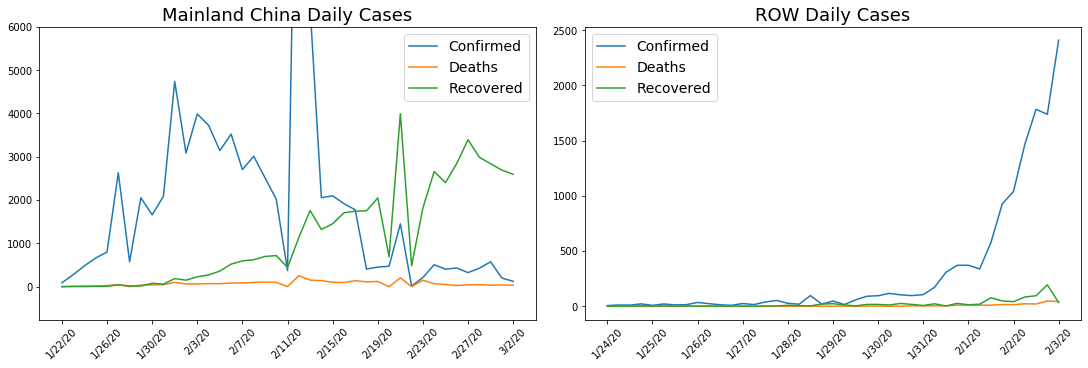

In [48]:
fig = plt.figure(figsize = (15, 5), constrained_layout=True)
gs = fig.add_gridspec(1,2)


# ax1 = fig.add_subplot(gs[0, 0])
# ax1.plot(np.transpose(total.to_numpy())[1:,:] - np.transpose(total.to_numpy())[:-1,:])
# myLocator = mticker.MultipleLocator(4)
# ax1.xaxis.set_major_locator(myLocator)
# ax1.set_ylim(top = 6000)
# ax1.tick_params(axis = 'x', labelrotation = 45)
# a = ax1.set_xticklabels(time_str[1:])
# ax1.legend(total.index, fontsize = 14)
# ax1.set_title('Total Daily Cases', size = 18)

ax2 = fig.add_subplot(gs[0, 0])
ax2.plot(np.transpose(mainland_china.to_numpy())[1:,:-1] - np.transpose(mainland_china.to_numpy())[:-1,:-1])
a = ax2.set_xticklabels(time_str[1:])
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.set_ylim(top = 6000)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(mainland_china.index, fontsize = 14)
ax2.set_title('Mainland China Daily Cases', size = 18)

ax3 = fig.add_subplot(gs[0, 1])
ax3.plot(np.transpose(others.to_numpy())[1:,:-1] - np.transpose(others.to_numpy())[:-1,:-1])
ax3.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax3.xaxis.set_major_locator(myLocator)
ax3.tick_params(axis = 'x', labelrotation = 45)
a = ax3.set_xticklabels(time_str[1:])
ax3.legend(others.index, fontsize = 14)
ax3.set_title('ROW Daily Cases', size = 18)

In [49]:
"""US"""

'US'

In [72]:
df_US = df_time_series.groupby(['Country/Region']).get_group(('US'))
df_Ca = pd.DataFrame()
df_DP = pd.DataFrame()
df_USmain = pd.DataFrame()
for i in df_US.index:
    if ('CA' in df_US.loc[i, 'Province/State']):
        if('(From Diamond Princess)' not in df_US.loc[i, 'Province/State']) :
            df_Ca = df_Ca.append(df_US.loc[i,:])
    if('(From Diamond Princess)'in df_US.loc[i, 'Province/State']) :
        df_DP = df_DP.append(df_US.loc[i,:])
    else:
        df_USmain = df_USmain.append(df_US.loc[i,:])
df_US = df_US.groupby('Category').sum().loc[:,time_str]
df_Ca = df_Ca.groupby('Category').sum().loc[:,time_str]
df_DP = df_DP.groupby('Category').sum().loc[:,time_str]
df_USmain = df_USmain.groupby('Category').sum().loc[:,time_str]

df_US.loc['Active',:] = df_US.loc['Confirmed',:] - (df_US.loc['Recovered',:] + df_US.loc['Deaths',:])
df_Ca.loc['Active',:] = df_Ca.loc['Confirmed',:] - (df_Ca.loc['Recovered',:] + df_Ca.loc['Deaths',:])
df_DP.loc['Active',:] = df_DP.loc['Confirmed',:] - (df_DP.loc['Recovered',:] + df_DP.loc['Deaths',:])
df_USmain.loc['Active',:] = df_USmain.loc['Confirmed',:] - (df_USmain.loc['Recovered',:] + df_USmain.loc['Deaths',:])

Text(0.5, 1.0, 'Daily Cases')

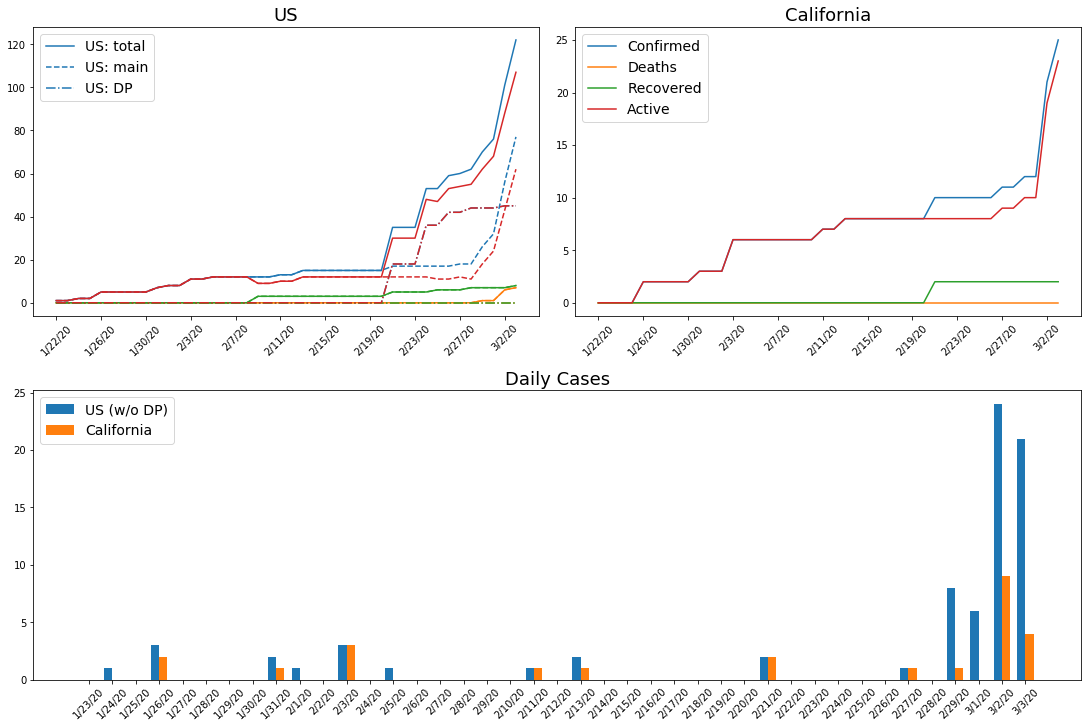

In [79]:
fig = plt.figure(figsize = (15, 10), constrained_layout=True)
gs = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(gs[0, 0])
for cat in cat_color:
    ax1.plot(df_US.loc[cat,:].transpose(), color = cat_color[cat])
    ax1.plot(df_USmain.loc[cat,:].transpose(), '--', color = cat_color[cat])
    ax1.plot(df_DP.loc[cat,:].transpose(), '-.', color = cat_color[cat])
legend = ['US: total', 'US: main', 'US: DP']
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.legend(legend, fontsize = 14)
ax1.set_title('US', size = 18)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(df_Ca.transpose())
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(others.index, fontsize = 14)
ax2.set_title('California', size = 18)

ax3 = fig.add_subplot(gs[1, :])
data1 = df_USmain.loc['Confirmed',:].to_numpy()[1:] - df_USmain.loc['Confirmed',:].to_numpy()[0:-1] 
data2 = df_Ca.loc['Confirmed',:].to_numpy()[1:] - df_Ca.loc['Confirmed',:].to_numpy()[0:-1] 
x = np.arange(len(data1))
width = 0.35
rects1 = ax3.bar(x - width/2, data1, width = width)
rects2 = ax3.bar(x + width/2, data2, width = width)
ax3.set_yscale('linear')
# ax3.set_yscale('linear')
# ax3.set_ylim([0, 1000])
a = ax3.set_xticks(x)
a = ax3.set_xticklabels(time_str[1:])
ax3.tick_params(axis = 'x', labelrotation = 45)
ax3.legend(['US (w/o DP)', 'California'], fontsize = 14)
ax3.set_title('Daily Cases', size = 18)

In [18]:
df_Ca.groupby('Category').get_group('Confirmed').loc[:,['Province/State', time_str[-1], 'New Today']]

,Province/State,3/3/20,New Today
47,"Orange, CA",1.0,0.0
48,"Los Angeles, CA",1.0,0.0
64,"Santa Clara, CA",11.0,2.0
68,"San Benito, CA",2.0,0.0
72,"San Diego County, CA",2.0,0.0
81,"Humboldt County, CA",1.0,0.0
82,"Sacramento County, CA",2.0,0.0
135,"Placer County, CA",1.0,0.0
136,"San Mateo, CA",2.0,1.0
138,"Sonoma County, CA",1.0,0.0


In [19]:
""" Mainland China """

' Mainland China '

In [81]:
mainland_china_group = df_time_series.groupby('Country/Region').get_group('Mainland China')
total_china = df_time_series.groupby('Country/Region').get_group('Mainland China').groupby('Category').sum().loc[:,time_str]
hubei = mainland_china_group.groupby('Province/State').get_group('Hubei').groupby('Category').sum().loc[:,time_str]
china_others = total_china - hubei

total_china.loc['Active',:] = total_china.loc['Confirmed',:] - (total_china.loc['Recovered',:] + total_china.loc['Deaths',:])
hubei.loc['Active',:] = hubei.loc['Confirmed',:] - (hubei.loc['Recovered',:] + hubei.loc['Deaths',:])
china_others.loc['Active',:] = china_others.loc['Confirmed',:] - (china_others.loc['Recovered',:] + china_others.loc['Deaths',:])

Text(0.5, 1.0, 'Other Provinces Daily')

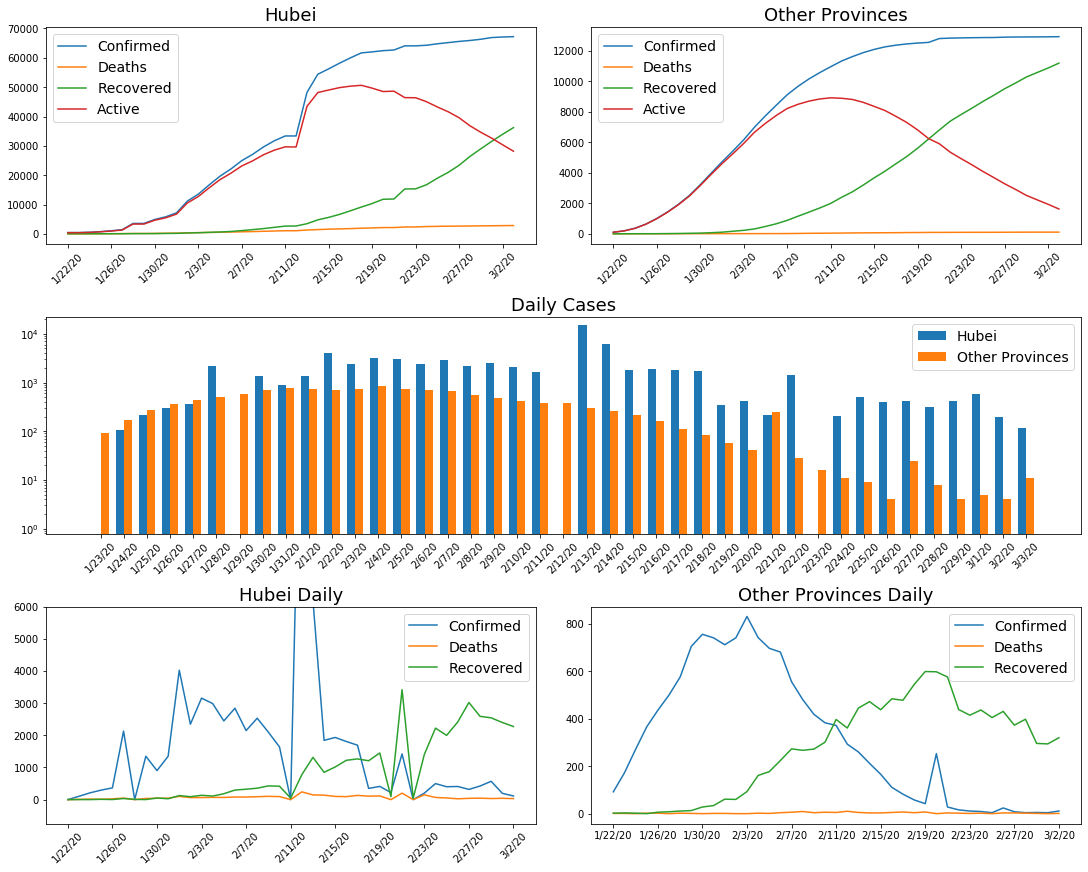

In [83]:
fig = plt.figure(figsize = (15, 12), constrained_layout=True)
gs = fig.add_gridspec(3,2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(hubei.transpose())
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)
ax1.legend(hubei.index, fontsize = 14)
ax1.set_title('Hubei', size = 18)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(china_others.transpose())
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)
ax2.legend(others.index, fontsize = 14)
ax2.set_title('Other Provinces', size = 18)

ax3 = fig.add_subplot(gs[1, :])
data1 = hubei.loc['Confirmed',:].to_numpy()[1:] - hubei.loc['Confirmed',:].to_numpy()[:-1]
data2 = china_others.loc['Confirmed',:].to_numpy()[1:] - china_others.loc['Confirmed',:].to_numpy()[0:-1]
x = np.arange(len(data1))
width = 0.35
rects1 = ax3.bar(x - width/2, data1, width = width)
rects2 = ax3.bar(x + width/2, data2, width = width)
ax3.set_yscale('log')
# ax3.set_yscale('linear')
# ax3.set_ylim([0, 1000])
a = ax3.set_xticks(x)
a = ax3.set_xticklabels(time_str[1:])
ax3.tick_params(axis = 'x', labelrotation = 45)
ax3.legend(['Hubei', 'Other Provinces'], fontsize = 14)
ax3.set_ylim(bottom = 10**-0.1)
ax3.set_title('Daily Cases', size = 18)

ax4 = fig.add_subplot(gs[2, 0])
ax4.plot(np.transpose(hubei.to_numpy())[1:,:-1] - np.transpose(hubei.to_numpy())[:-1,:-1])
ax4.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax4.xaxis.set_major_locator(myLocator)
ax4.set_ylim(top = 6000)
ax4.tick_params(axis = 'x', labelrotation = 45)
ax4.legend(mainland_china.index, fontsize = 14)
ax4.set_title('Hubei Daily', size = 18)

ax5 = fig.add_subplot(gs[2, 1])
ax5.plot(np.transpose(china_others.to_numpy())[1:,:-1] - np.transpose(china_others.to_numpy())[:-1,:-1])
ax5.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax5.xaxis.set_major_locator(myLocator)
ax4.tick_params(axis = 'x', labelrotation = 45)
ax5.legend(others.index, fontsize = 14)
ax5.set_title('Other Provinces Daily', size = 18)

In [84]:
""" Outside Mainland China"""

' Outside Mainland China'

In [118]:
df_confirmed = df_time_series.groupby('Category').get_group('Confirmed').groupby('Country/Region').sum()
df_active = df_time_series.groupby('Category').get_group('Confirmed').groupby('Country/Region').sum()\
            - (df_time_series.groupby('Category').get_group('Recovered').groupby('Country/Region').sum() \
               + df_time_series.groupby('Category').get_group('Deaths').groupby('Country/Region').sum())

['South Korea', 'Iran', 'Italy', 'Mainland China', 'Spain', 'Germany', 'US', 'Japan', 'Switzerland', 'France']


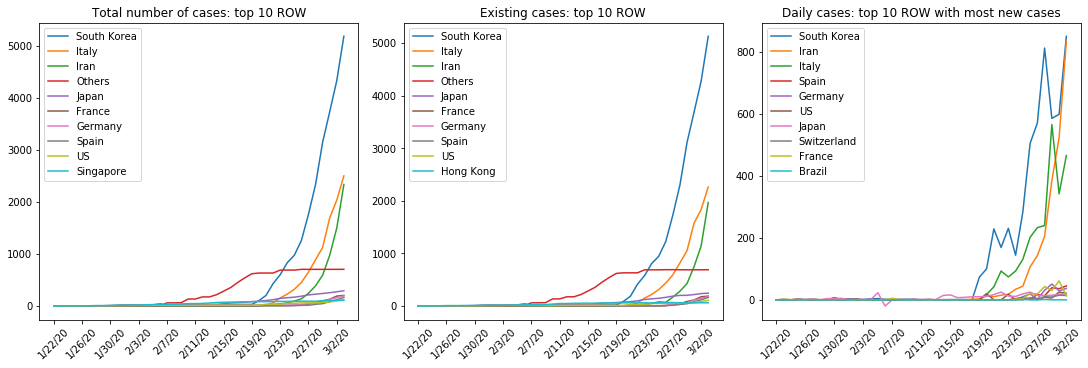

In [123]:
fig = plt.figure(figsize = (15, 5), constrained_layout=True)
gs = fig.add_gridspec(1,3)

ax1 = fig.add_subplot(gs[0, 0])

df_confirmed.sort_values(by = time_str[-1], inplace = True, ascending=False)
countries = list(df_confirmed.index[1:11])
df_plot = df_confirmed.loc[countries,time_str]

ax1.plot(df_plot.transpose())
ax1.legend(countries)
ax1.set_yscale('linear')
# plt.ylim(top = 2000)
ax1.set_title('Total number of cases: top 10 ROW')
myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
ax1.tick_params(axis = 'x', labelrotation = 45)

ax2 = fig.add_subplot(gs[0, 2])

df_confirmed.sort_values(by = 'New Today', inplace = True, ascending=False)
countries = list(df_confirmed.index[0:10])
print(countries)
if('Mainland China' in countries):
    countries.remove('Mainland China')
    countries.append(df_current.index[11])
data = df_confirmed.loc[countries,time_str].to_numpy().transpose()

ax2.plot(data[1:,:] - data[0:-1,:])
ax2.legend(countries)
ax2.set_yscale('linear')
# plt.ylim(top = 200)
ax2.set_title('Daily cases: top 10 ROW with most new cases')
ax2.xaxis.set_major_formatter(mticker.FuncFormatter(format_fn))
myLocator = mticker.MultipleLocator(4)
ax2.xaxis.set_major_locator(myLocator)
ax2.tick_params(axis = 'x', labelrotation = 45)

ax3 = fig.add_subplot(gs[0, 1])

df_active.sort_values(by = time_str[-1], inplace = True, ascending=False)
countries = list(df_active.index[1:11])
df_plot = df_active.loc[countries,time_str]

ax3.plot(df_plot.transpose())
ax3.legend(countries)
ax3.set_yscale('linear')
# plt.ylim(top = 2000)
ax3.set_title('Existing cases: top 10 ROW')
myLocator = mticker.MultipleLocator(4)
ax3.xaxis.set_major_locator(myLocator)
ax3.tick_params(axis = 'x', labelrotation = 45)

In [124]:
df_current.loc[countries + ['Mainland China'],'New Today']

Country/Region
South Korea       851
Italy             466
Iran              835
Others              1
Japan              19
France             13
Germany            37
Spain              45
US                 21
Hong Kong           0
Mainland China    125
Name: New Today, dtype: int64

In [125]:
### world bar graph

In [126]:
df_confirmed = df_time_series.groupby('Category').get_group('Confirmed').groupby('Country/Region').sum()
df_recovered = df_time_series.groupby('Category').get_group('Recovered').groupby('Country/Region').sum()
df_deaths = df_time_series.groupby('Category').get_group('Deaths').groupby('Country/Region').sum()
df_confirmed.sort_values(by = time_str[-1], inplace = True, ascending=False)
df_recovered.sort_values(by = time_str[-1], inplace = True, ascending=False)
df_deaths.sort_values(by = time_str[-1], inplace = True, ascending=False)

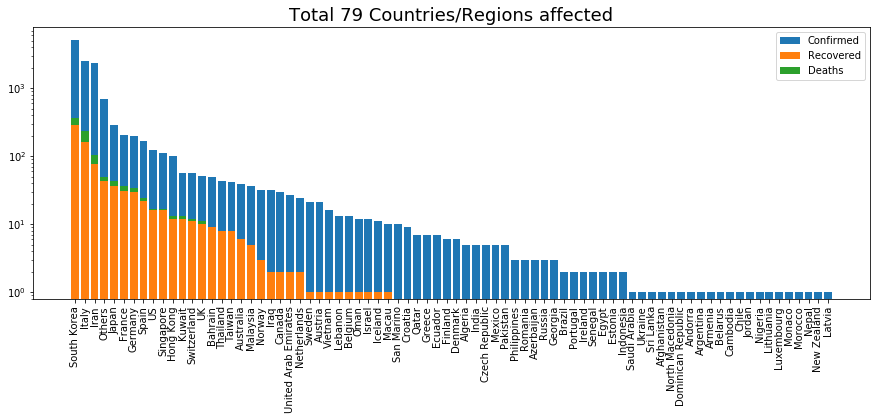

In [127]:
recovered = df_recovered.iloc[1:][time_str[-1]].to_numpy()
deaths = df_deaths.iloc[1:][time_str[-1]].to_numpy()
confirmed = df_confirmed.iloc[1:][time_str[-1]].to_numpy()
x = np.arange(len(confirmed))

fig, ax = plt.subplots(1,1,figsize = (15,5))
plt.bar(x, confirmed)
plt.bar(x, recovered)
plt.bar(x, deaths, bottom = recovered)

plt.legend(['Confirmed', 'Recovered', 'Deaths'])
plt.yscale('log')
plt.ylim(bottom = 10**-0.1)
a = ax.set_xticks(x)
a = ax.set_xticklabels(list(df_confirmed.index)[1:])
a = plt.xticks(rotation=90)
a = plt.title(f'Total {len(df_confirmed.index)} Countries/Regions affected', fontsize = 18)